# 使用 MLP 实现

## 设置

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 载入数据

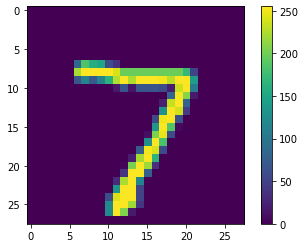

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### load_data()
**返回**：

   两个元组：

    x_train, x_test: uint8 数组表示的灰度图像，尺寸为 (num_samples, 28, 28)

    y_train, y_test: uint8 数组表示的数字标签（范围在 0-9 之间的整数），尺寸为 (num_samples,)

**参数**：
path: 如果在本地没有索引文件 (at '~/.keras/datasets/' + path), 它将被下载到该目录
#### Mnist 数据集

训练集为 60,000 张 28x28 像素灰度图像，测试集为 10,000 同规格图像，总共 10 类数字标签。

## 处理原始数据

In [5]:

x_train = x_train / 255.0       #隐式转换为float64
x_test = x_test / 255.0

print(x_train.shape,"train data")
print(x_test.shape,"test data")

(60000, 28, 28) train data
(10000, 28, 28) test data


将原始数据归一化。[归一化的作用](https://blog.csdn.net/dbat2015/article/details/50008315 "最好的markdown教程")

## 转换标签

In [6]:
from keras.utils import to_categorical


y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_test)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


使用 [to_categorical()](https://www.geeksforgeeks.org/python-keras-keras-utils-to_categorical/) 将标签向量转化为 binary matrix 

## 构建模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten


model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu',name="Dense1")) #添加全连接层
model.add(Dropout(0.3,name='dropout1'))
model.add(Dense(128,activation='relu',name='Dense2'))
model.add(Dropout(0.3,name='dropout2'))
model.add(Dense(10,activation='softmax',name='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 512)               401920    
_________________________________________________________________
dropout1 (Dropout)           (None, 512)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 128)               65664     
_________________________________________________________________
dropout2 (Dropout)           (None, 128)               0         
_________________________________________________________________
softmax (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
__________________________________________________

网络第一层 `Flatten` 将图像转换成以为数组，该层没有要学习的参数。

每个 `Dense` 层有 512 神经元， 最后一个使用 `softmax` 激活函数，它可以将一个数值向量归一化为一个概率分布向量:

$$
Softmax(zi) = \frac{e^{z_i}}{\sum_j {e^{z_j}}}
$$

## 编译模型

In [8]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adamax

model.compile(optimizer=Adamax(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

使用 `Admax` [优化器](https://keras.io/zh/optimizers/)，`categotical_crossentropy`（交叉熵损失） 作为[损失函数](https://keras.io/zh/losses/)，通常与 softmax 配合使用：
$$
Loss = -log(1-p_i) 
$$
$p_i$是预测样本真实标签得到的概率

## 训练模型
调用 `model.fit` 方法，这样命名因为会将模型与训练数据进行拟合

In [9]:
model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.7144 - accuracy: 0.7838 - val_loss: 0.1901 - val_accuracy: 0.9447
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2355 - accuracy: 0.9317 - val_loss: 0.1319 - val_accuracy: 0.9605
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1644 - accuracy: 0.9515 - val_loss: 0.1056 - val_accuracy: 0.9678
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1290 - accuracy: 0.9617 - val_loss: 0.0917 - val_accuracy: 0.9717
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1077 - accuracy: 0.9687 - val_loss: 0.0837 - val_accuracy: 0.9743
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0963 - accuracy: 0.9710 - val_loss: 0.0751 - val_accuracy: 0.9759
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0802 - accuracy: 0.9763 - val_loss: 0.0738 - val_accuracy: 0.9772
Epoch 

`epochs` 是训练次数，`validation_date` 是划分出测试集，训练集正确率达到98%以上

## 评估准确率

In [41]:
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=1)

print('\nTest accurancy', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0284 - accuracy: 0.9916

Test accurancy 0.991599977016449


## 进行预测

来看第一个预测结果

In [11]:
import numpy as np

predictions= model.predict(x_test)
predictions[0]
np.argmax(predictions[0])

7

可以绘制图表，查看对全部类的预测

In [34]:
def plot_image(i,predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label, img
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:3.0f}% ({})".format(predicted_label,
                                      100*np.max(predictions_array),true_label),color=color)

def plot_value_array(i,predictions_array, true_label):
   predictions_array, true_label = predictions_array, true_label
   plt.grid(False)
   plt.xticks(range(10))
   plt.yticks([])
   thisplot = plt.bar(range(10), predictions_array, color="#777777")
   plt.ylim([0,1])
   predicted_label = np.argmax(predictions_array)

   thisplot[predicted_label].set_color('red')
   thisplot[true_label].set_color('blue')

正确标签为蓝色，错误为红色
## 验证预测结果

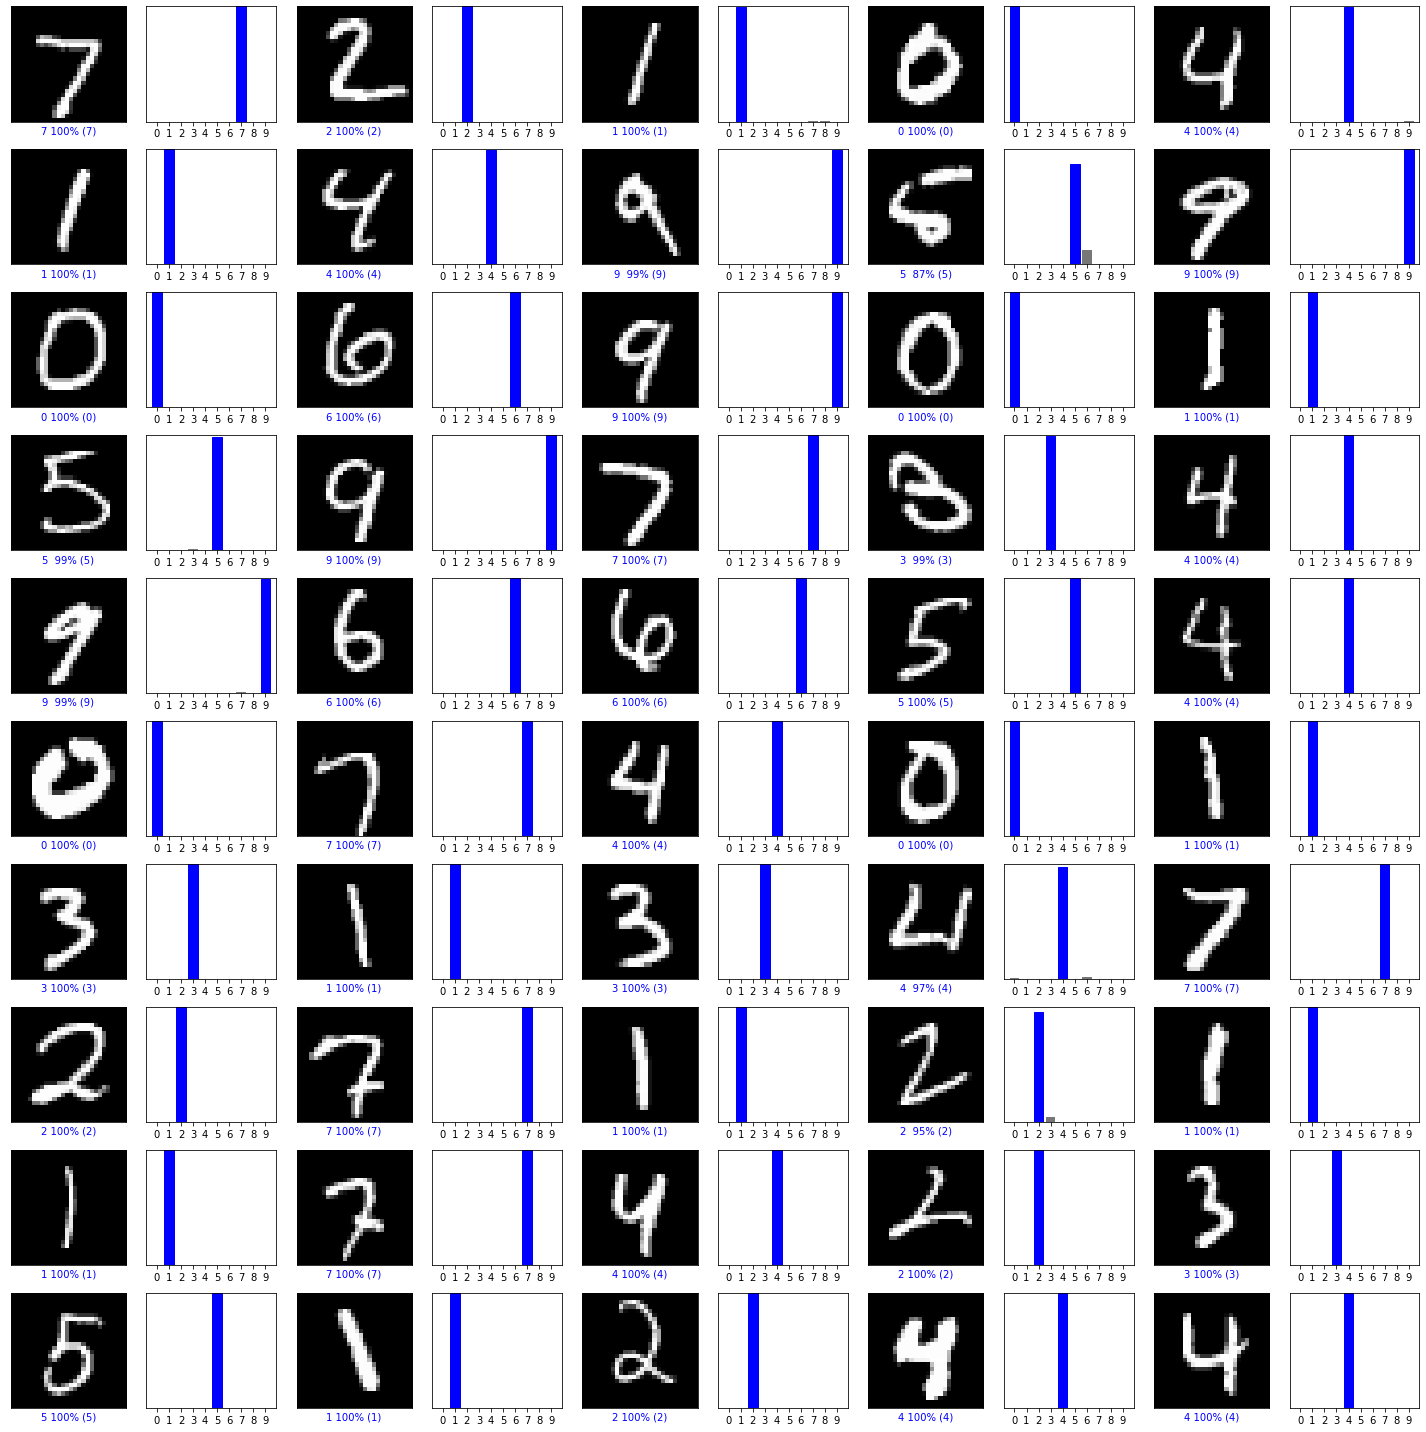

In [40]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
x_test.reshape(10000,28,28)
for i in range(num_images):
  t = np.argmax(y_test[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], t, x_test[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], t)
plt.tight_layout()
plt.show()

# 使用 CNN 

## 重新载入数据

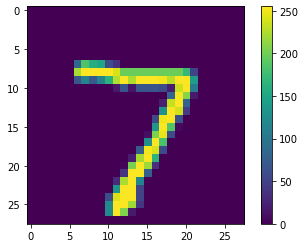

In [36]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

import numpy as np
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x.shape = (samples_nums, height, width, channels)

## 构建模型

In [42]:
from keras.layers import Conv2D,MaxPooling2D
model = Sequential()
input_size = (28,28,1)
model.add(Conv2D(32,
          kernel_size = (3,3), 
          activation = 'relu',
          input_shape = input_size))

model.add(Dropout(0.3))

model.add(Conv2D(16,
          kernel_size = (3,3), 
          activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_12 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

## 编译和训练模型
选择 `Adamdelta` 作为优化器

In [43]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(), loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 6s 9ms/step - loss: 0.6243 - accuracy: 0.8000 - val_loss: 0.0790 - val_accuracy: 0.9767
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1273 - accuracy: 0.9605 - val_loss: 0.0503 - val_accuracy: 0.9837
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0927 - accuracy: 0.9715 - val_loss: 0.0396 - val_accuracy: 0.9874
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0748 - accuracy: 0.9758 - val_loss: 0.0387 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0634 - accuracy: 0.9814 - val_loss: 0.0355 - val_accuracy: 0.9880
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0558 - accuracy: 0.9828 - val_loss: 0.0331 - val_accuracy: 0.9900
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0502 - accuracy: 0.9835 - val_loss: 0.0295 - val_accuracy: 0.9911
Epoch 

## 评估准确率

313/313 - 1s - loss: 0.0303 - accuracy: 0.9912

Test accuracy: 0.9911999702453613


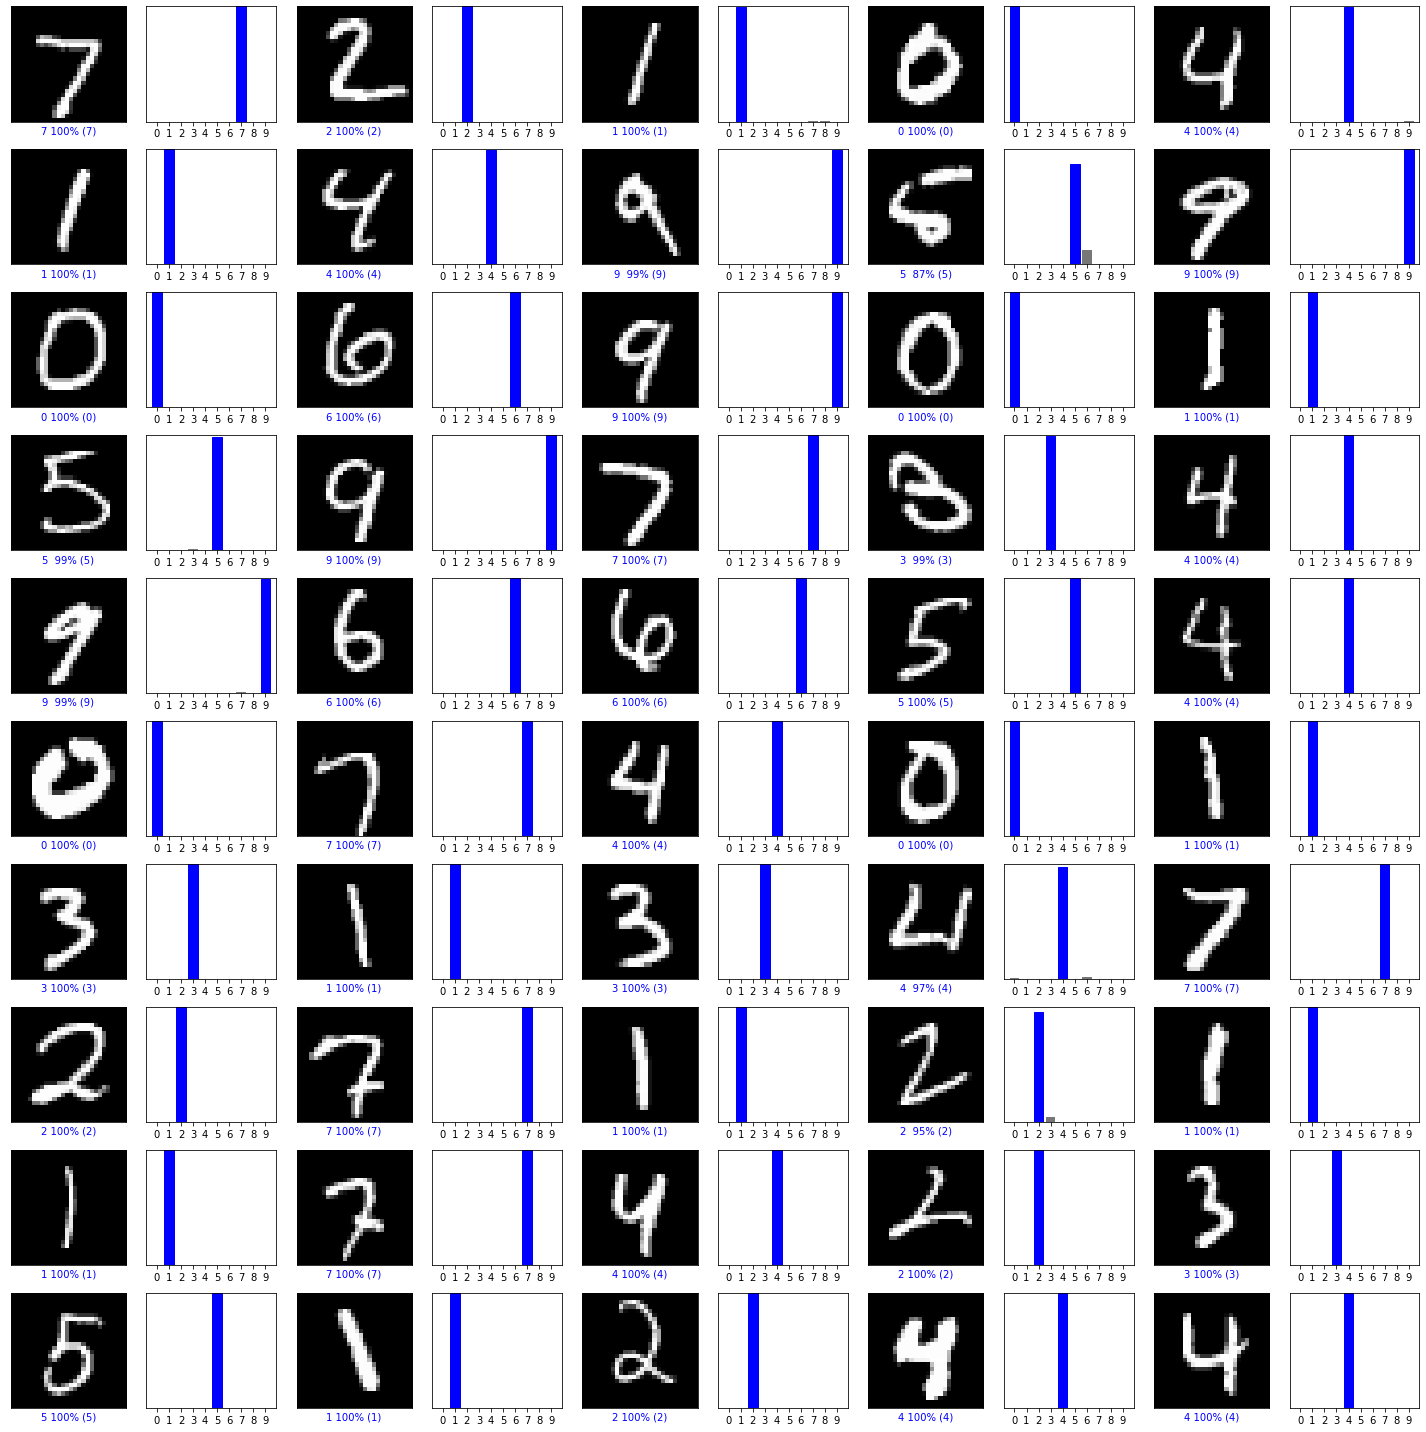

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose= 2)

print('\nTest accuracy:', test_acc)

num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
x_test.reshape(10000,28,28)
for i in range(num_images):
  t = np.argmax(y_test[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], t, x_test[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], t)
plt.tight_layout()
plt.show()

## CNN 与 MLP 对比
1. CNN 能提取像素间的空间关系，而 MLP 将图像变为一维向量丢失空间信息
2. MLP 是每一层是全连接的，参数数量多， CNN 每一层共享 kernel ，节点之间不是全连接，因此参数大小取决于 kernel 大小，参数数量少
3. CNN　具有 *局部平移不变性*, 即无论图像出现在那个位置，都能提取到该特征。（因为共享 filter）. 而 MLP 不具有平移不变性，如果一张图片的特征出现在左上，而另一张特征出现在右下，那么 MLP 将尝试往右下修正参数。